In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import auc, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

In [9]:
data = pd.read_table('SMSSpamCollection', header=None, names = ['Class', 'sms'])
data['label'] = data.Class.map({'ham':0, 'spam':1})
data = data.drop('Class', axis=1)

In [10]:
data.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
X = data.sms
y = data.label

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [46]:
vect = CountVectorizer(stop_words='english')

In [47]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [48]:
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [16]:
mnb = MultinomialNB()

In [17]:
mnb.fit(X_train_transformed, y_train)
y_pred = mnb.predict_proba(X_test_transformed)

In [19]:
y_pred_class = mnb.predict(X_test_transformed)

In [20]:
print(metrics.accuracy_score(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))

0.9877961234745154
[[1211    8]
 [   9  165]]


In [21]:
print("Sensitivity = ", confusion_matrix(y_test, y_pred_class)[1,1]
      /float(confusion_matrix(y_test, y_pred_class)[1,1]+confusion_matrix(y_test, y_pred_class)[1,0]))

Sensitivity =  0.9482758620689655


In [22]:
print("Specificity = ", confusion_matrix(y_test, y_pred_class)[0,0]
      /float(confusion_matrix(y_test, y_pred_class)[0,0]+confusion_matrix(y_test, y_pred_class)[0,1]))

Specificity =  0.9934372436423298


In [24]:
print("Precision = ", metrics.precision_score(y_test, y_pred_class))
print("Recall = ", metrics.recall_score(y_test, y_pred_class))
print("F1 mean = ", metrics.f1_score(y_test, y_pred_class))

Precision =  0.953757225433526
Recall =  0.9482758620689655
F1 mean =  0.9510086455331412


In [25]:
y_pred

array([[9.99999996e-01, 3.61677647e-09],
       [1.23915215e-05, 9.99987608e-01],
       [9.99395282e-01, 6.04717711e-04],
       ...,
       [1.91308216e-20, 1.00000000e+00],
       [5.72698182e-18, 1.00000000e+00],
       [9.99999954e-01, 4.59495555e-08]])

In [26]:
print(y_pred[:, 1])

[3.61677647e-09 9.99987608e-01 6.04717711e-04 ... 1.00000000e+00
 1.00000000e+00 4.59495555e-08]


In [27]:
fpr, tpr, threshold = roc_curve(y_test, y_pred[:,1])
auc = auc(fpr,tpr)
print(auc)

0.9957285508189302


In [28]:
df = pd.DataFrame({'threshold':threshold,
                  'fpr':fpr,
                  'tpr':tpr})
df

,threshold,fpr,tpr
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.000000,0.321839
2,1.000000e+00,0.000000,0.339080
3,1.000000e+00,0.000000,0.344828
4,1.000000e+00,0.000000,0.356322
...,...,...,...
106,1.394898e-08,0.866284,1.000000
107,1.324401e-08,0.867925,1.000000
108,4.236367e-10,0.916325,1.000000
109,3.982546e-10,0.918786,1.000000


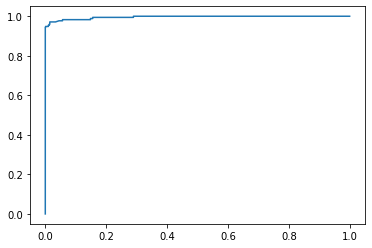

In [29]:
plt.plot(fpr, tpr)
plt.show()

In [30]:
from sklearn.naive_bayes import BernoulliNB

In [49]:
bnb = BernoulliNB()
bnb.fit(X_train_transformed, y_train)
y_pred2 = bnb.predict_proba(X_test_transformed)
y_pred_class2 = bnb.predict(X_test_transformed)

In [50]:
print(metrics.accuracy_score(y_test, y_pred_class2))
print(confusion_matrix(y_test, y_pred_class2))

0.9770279971284996
[[1207    1]
 [  31  154]]


In [51]:
print("Sensitivity = ", confusion_matrix(y_test, y_pred_class2)[1,1]
      /float(confusion_matrix(y_test, y_pred_class2)[1,1]+confusion_matrix(y_test, y_pred_class2)[1,0]))
print("Specificity = ", confusion_matrix(y_test, y_pred_class2)[0,0]
      /float(confusion_matrix(y_test, y_pred_class2)[0,0]+confusion_matrix(y_test, y_pred_class2)[0,1]))

Sensitivity =  0.8324324324324325
Specificity =  0.9991721854304636


In [52]:
print("Precision = ", metrics.precision_score(y_test, y_pred_class2))
print("Recall = ", metrics.recall_score(y_test, y_pred_class2))
print("F1 mean = ", metrics.f1_score(y_test, y_pred_class2))

Precision =  0.9935483870967742
Recall =  0.8324324324324325
F1 mean =  0.9058823529411765


In [66]:
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred2[:,1])

In [71]:
auc2 = auc(fpr2,tpr2)
print(auc2)

TypeError: 'numpy.ndarray' object is not callable

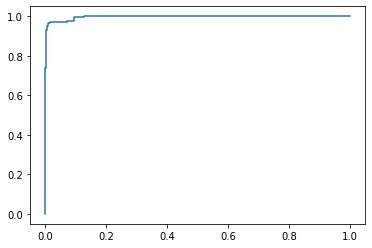

In [68]:
plt.plot(fpr2, tpr2)

In [69]:
df2 = pd.DataFrame({'threshold':threshold2,
                  'fpr':fpr2,
                  'tpr':tpr2})
df2

,threshold,fpr,tpr
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.000000,0.254054
2,1.000000e+00,0.000000,0.286486
3,1.000000e+00,0.000000,0.297297
4,1.000000e+00,0.000000,0.302703
...,...,...,...
101,3.481678e-13,0.932119,1.000000
102,3.468137e-13,0.933775,1.000000
103,3.256825e-13,0.935430,1.000000
104,3.248228e-13,0.937086,1.000000
